# Problem Statement

# Business Understanding

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.



The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


# Requirements 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.



## Business Goal



You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## Business Risk

- Customers will not buy a house if the company predicts a sale price that is higher than its value, resulting in a loss for the company.

## Lets start by importing necessary libraries, can be done in single shot or as and when required

In [97]:
# Importing required modules 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
# For calculate VIF of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from scipy import stats
%matplotlib inline

## Loading the data 

In [98]:
# reading the dataset
#housing = pd.read_csv("train.csv", na_values="NAN")
housing = pd.read_csv("train.csv")

## Data Understanding

In [99]:
# Let's take a look at the first few rows
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [100]:
#Lets look at the total number of rows and columns
housing.shape

(1460, 81)

In [101]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Summary of the dataset : 1460 rows, 81 columns

In [102]:
# Lets get some more information about the dataset using describe() methods
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Target variable 'SalePrice' vs a few select columns (Bivariate Analysis)

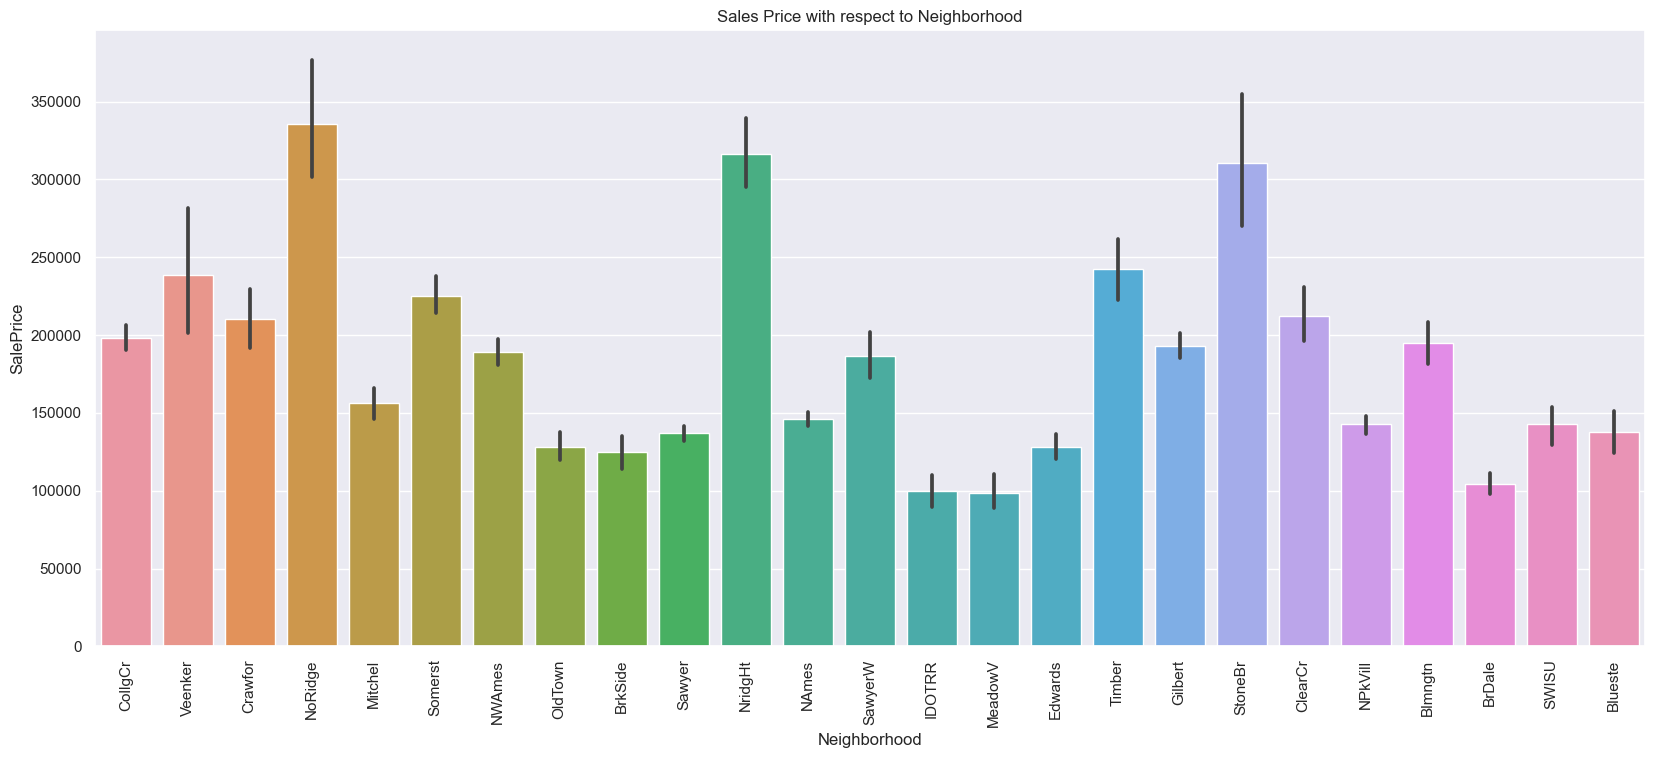

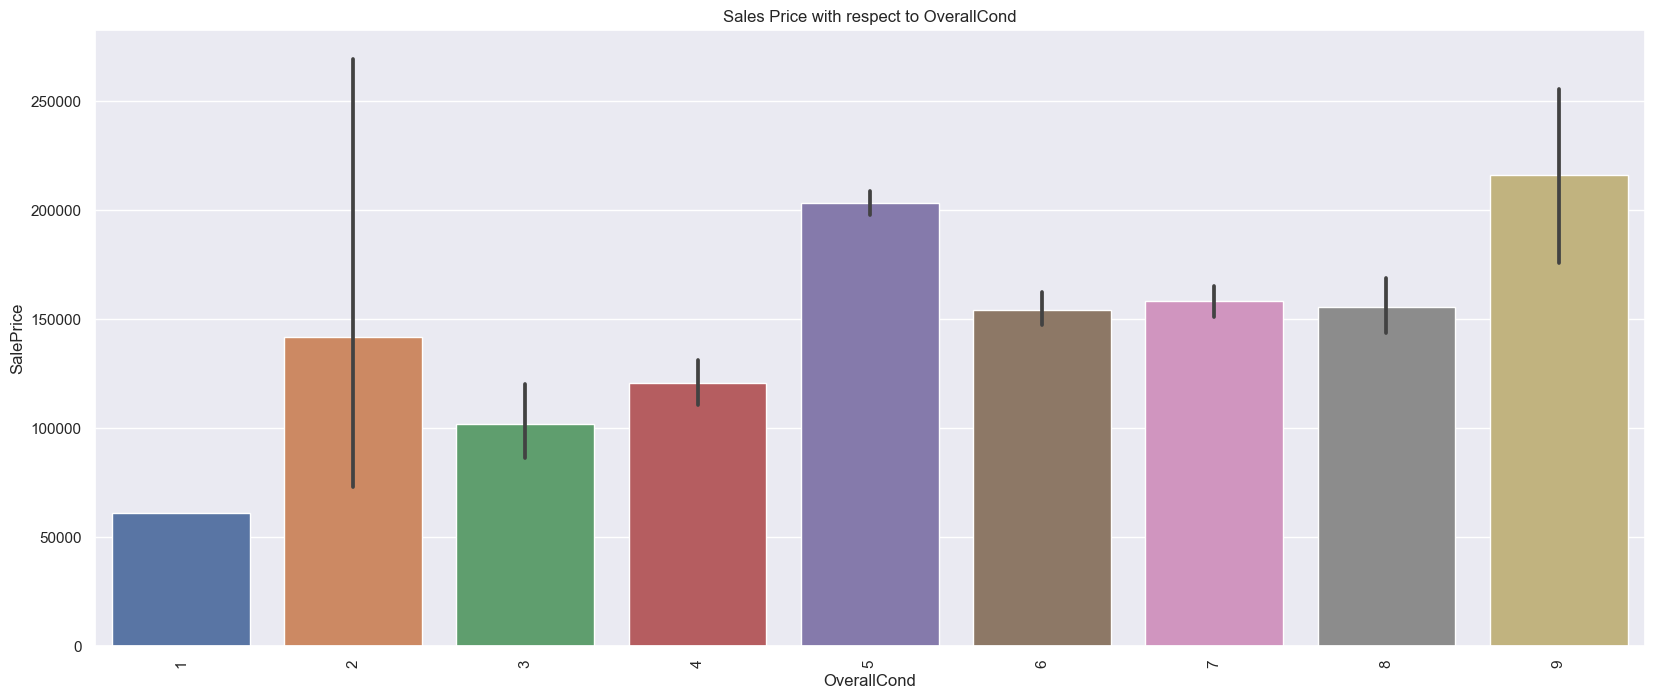

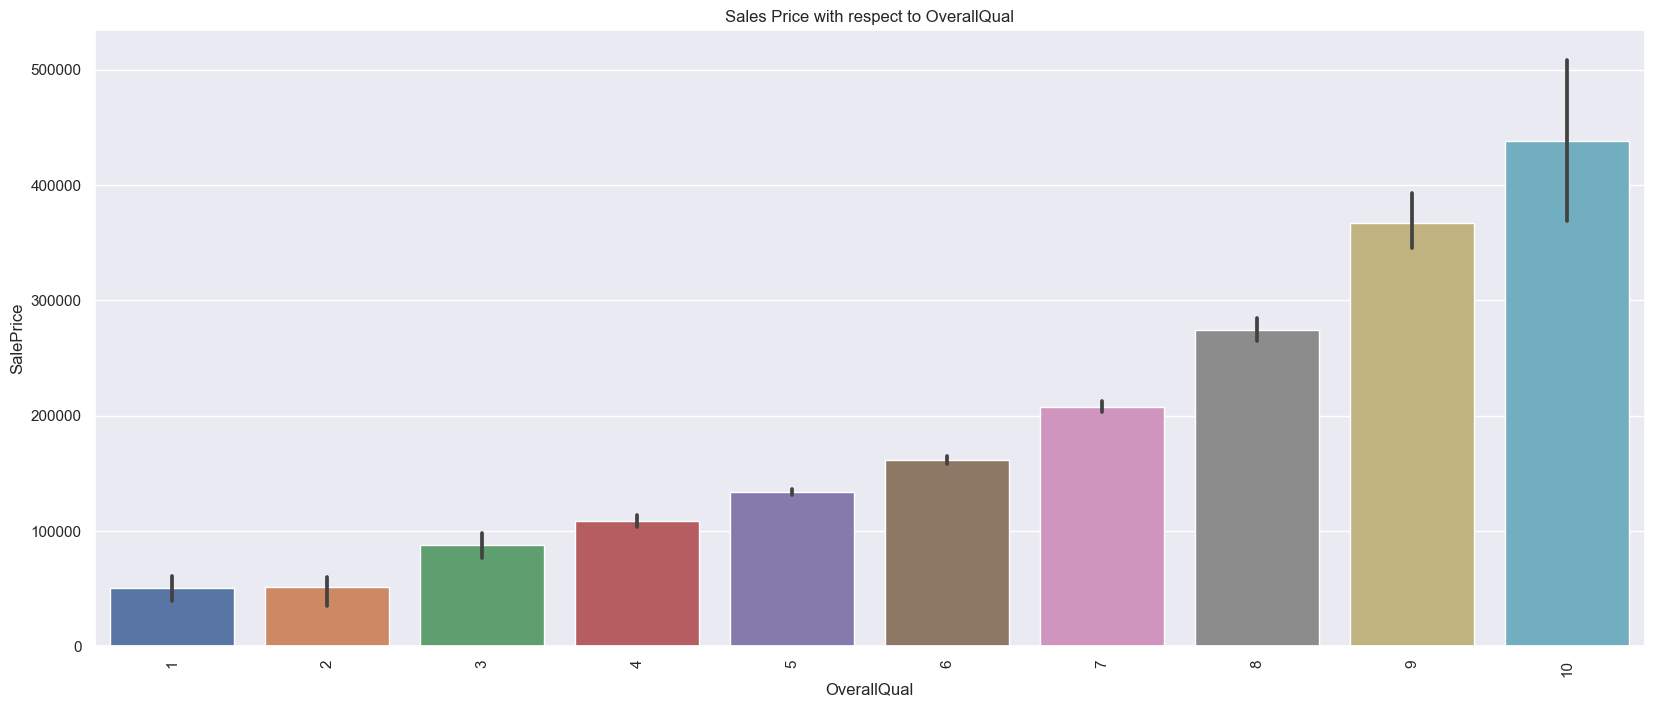

In [103]:
colstoplot = ["Neighborhood", "OverallCond", "OverallQual"]

for col in colstoplot:
    plt.figure(figsize=(20, 8))
    sns.barplot(x=col, y="SalePrice", data=housing)
    plt.title(f"Sales Price with respect to {col}")
    plt.xticks(rotation=90)
    plt.show()


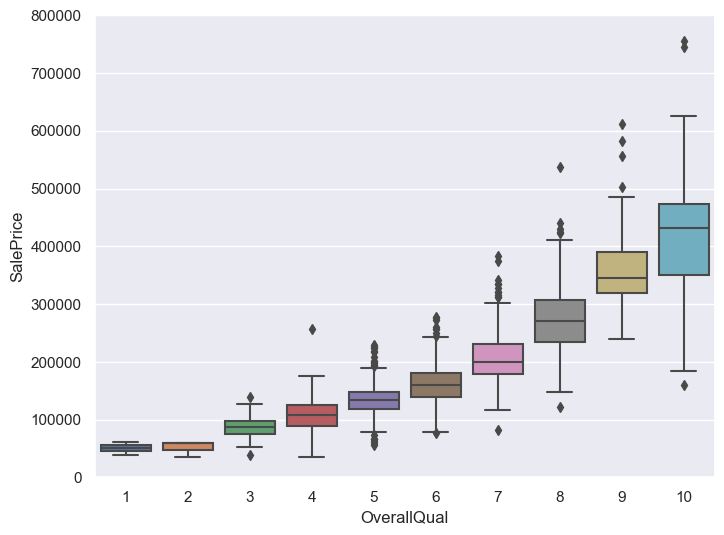

In [104]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

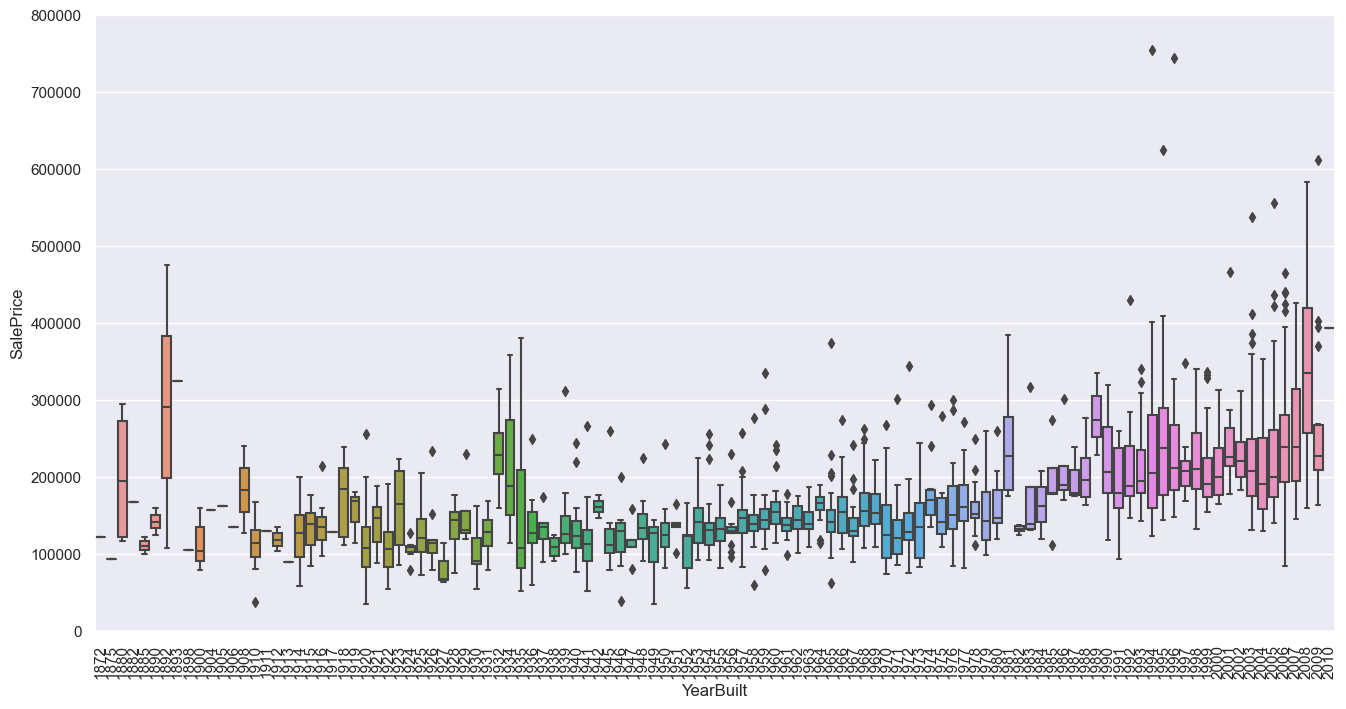

In [105]:
var = 'YearBuilt'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

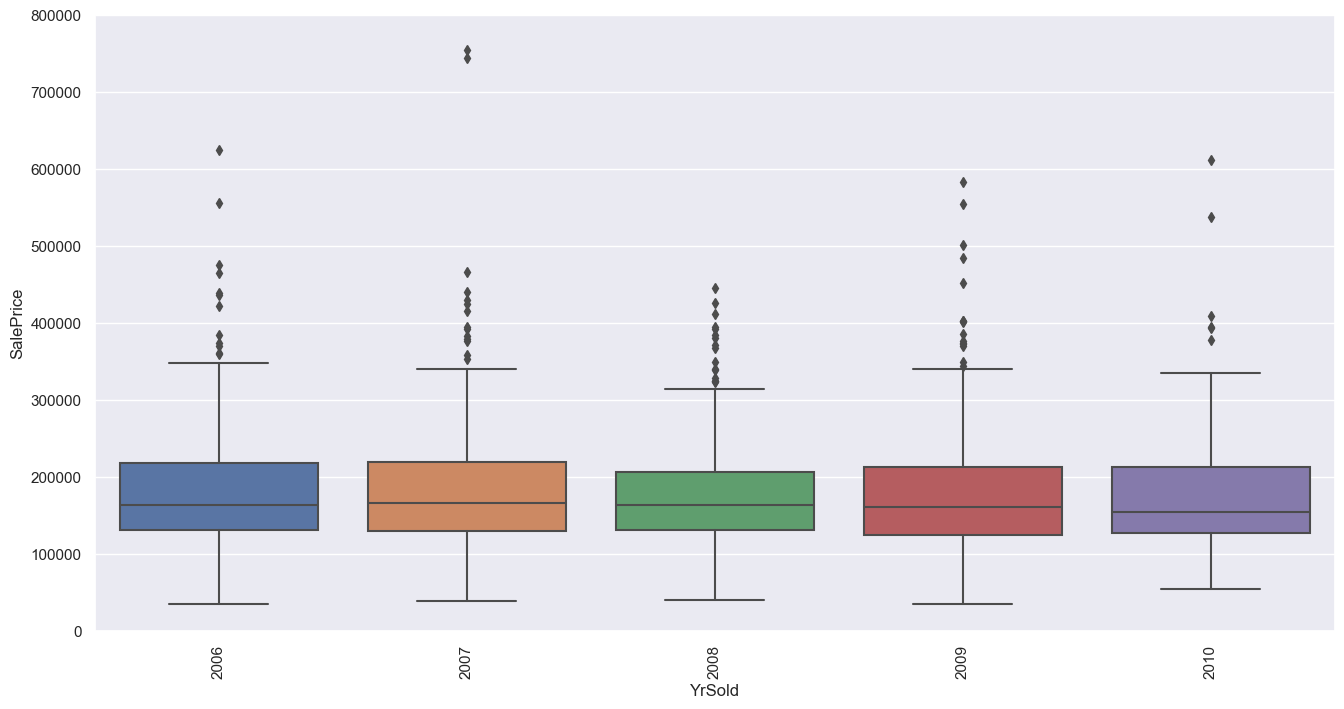

In [106]:
var = 'YrSold'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [107]:
# PropertyAge -  Property Age from yearsold - yearbuilt
housing['PropertyAge'] = (housing['YrSold'] - housing['YearBuilt'])
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


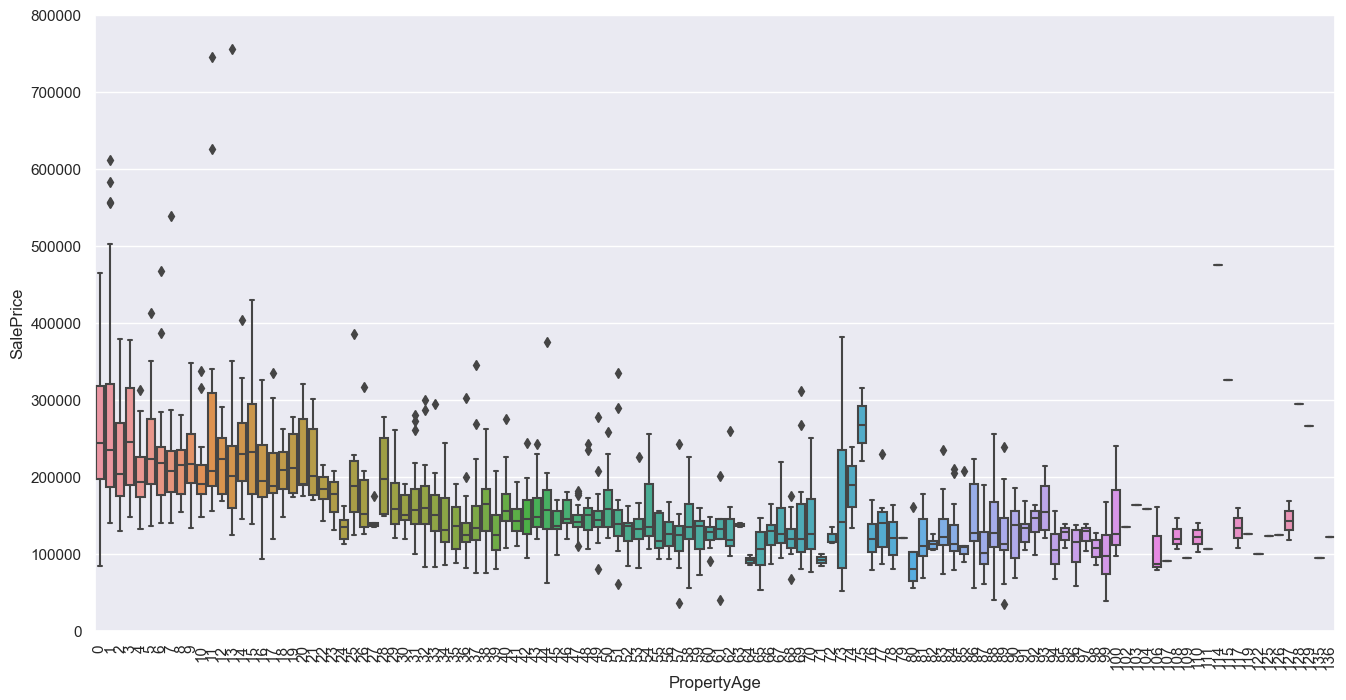

In [108]:
var = 'PropertyAge'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### There is a negative relationship between property age and saleprice. This implies that newer properties are more valuable than older ones.

# Data Cleaning

Data cleaning is a very time-consuming step of data analysis because data quality issues can vary widely.

## The column Month sold and Year Sold, Year built and Year remodelled are not useful for us, so we can get rid of them

In [109]:
housing.drop(["MoSold", "YearRemodAdd", "YearBuilt", "YrSold"], axis=1, inplace=True)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropertyAge
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,250000,8


## Checking for Outliers

In [110]:
housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,...,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,84.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,...,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,91.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,791.920000,1572.410000,830.380000,1797.050000,...,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,110.410000


## Method to remove outliers

In [111]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

## Checking for the missing values



In [112]:
print("Missing Values by Column")
print("-"*50)
print(housing.isna().sum()) #can filter as well
print("-"*50)

null_cols = round(housing.isnull().mean()*100, 2)

filtered_cols = null_cols[null_cols > 0]

features_withna = filtered_cols.index

print("TOTAL MISSING VALUES for each column (in %):\n",filtered_cols )

print(f"Features cols with missing values :{features_withna}")

Missing Values by Column
--------------------------------------------------
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
SaleType           0
SaleCondition      0
SalePrice          0
PropertyAge        0
Length: 78, dtype: int64
--------------------------------------------------
TOTAL MISSING VALUES for each column (in %):
 LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64
Features cols with missing values :Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure

## Since they are many missing values, we need to find the relationship between missing values and Sales Price

<Axes: xlabel='SalePrice', ylabel='Density'>

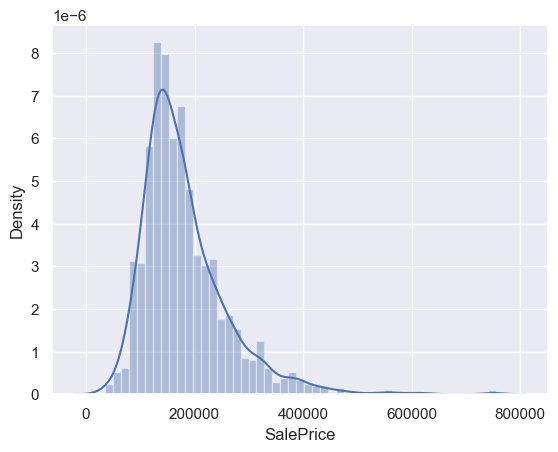

In [113]:
sns.distplot(housing['SalePrice'])

In [114]:
print("Skewness: %f" % housing['SalePrice'].skew())
print("Kurtosis: %f" % housing['SalePrice'].kurt())
print("Std :%f" % housing["SalePrice"].std())

Skewness: 1.882876
Kurtosis: 6.536282
Std :79442.502883


## From the above analysis, we can infer that
1. The response variable "SalePrice" values are skewed - positive skewed to be specific. This implies that the data has longer right tail and the most of the values are concentrated to the left. Hence, Mean is greater than median value.
2. There is presence of outliers.
3. Normal distribution of the data is not seen.
4. Skew value is greater than 1, confirming the highly skewed nature of the data
5. High kurtosis value signifies highly poeaked values i.e., Leptokurtic to be specific

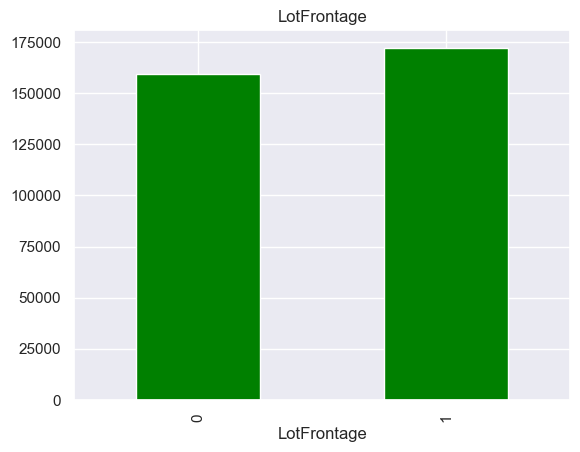

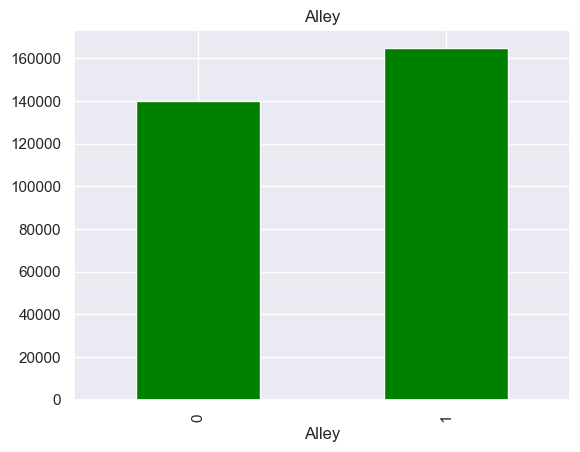

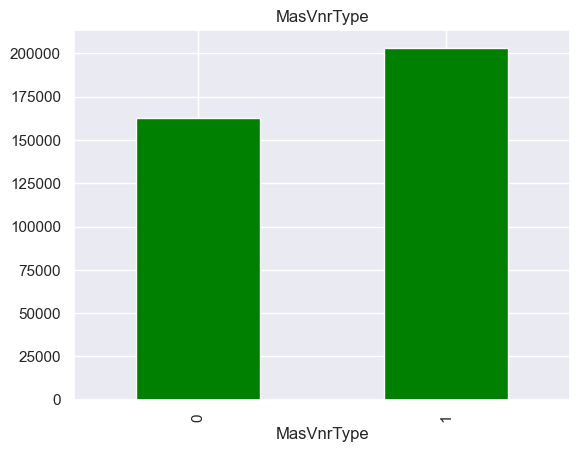

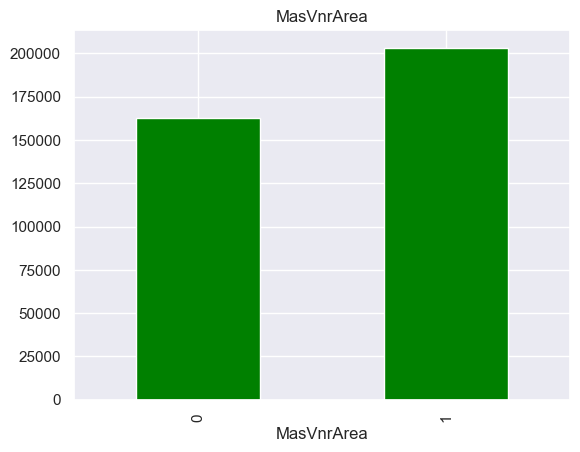

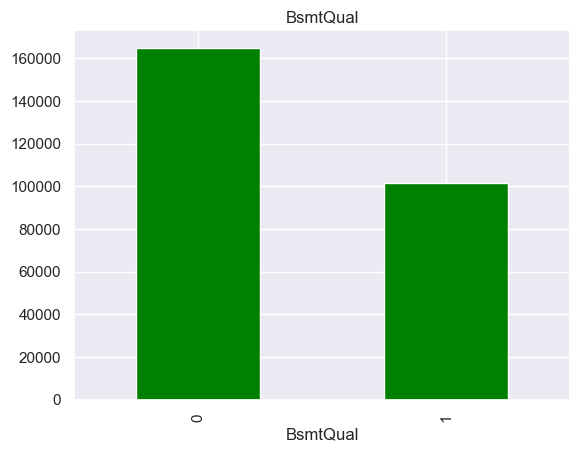

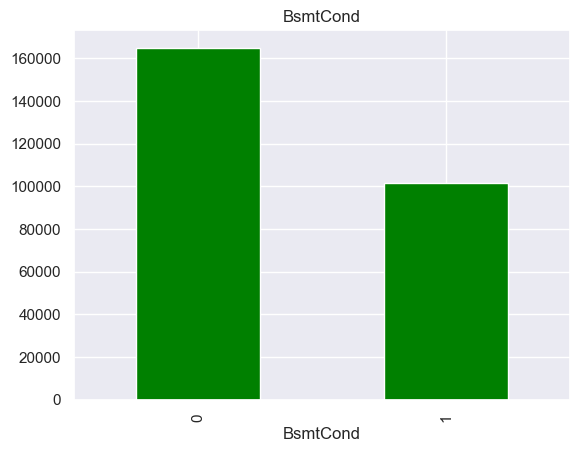

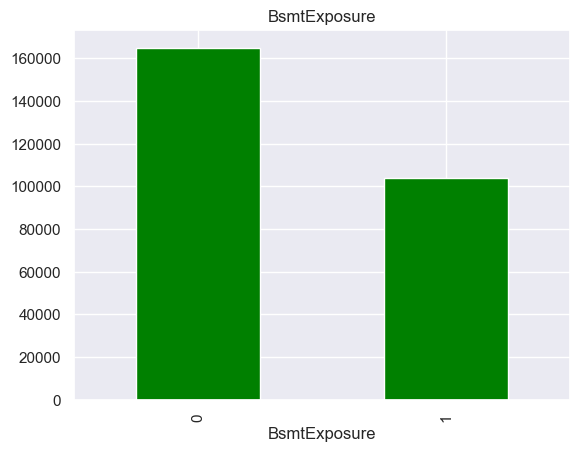

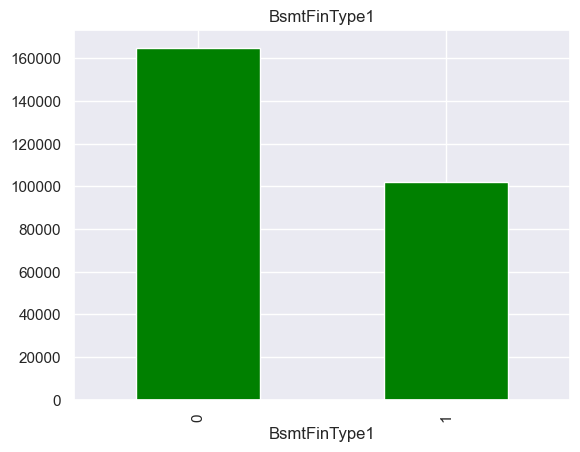

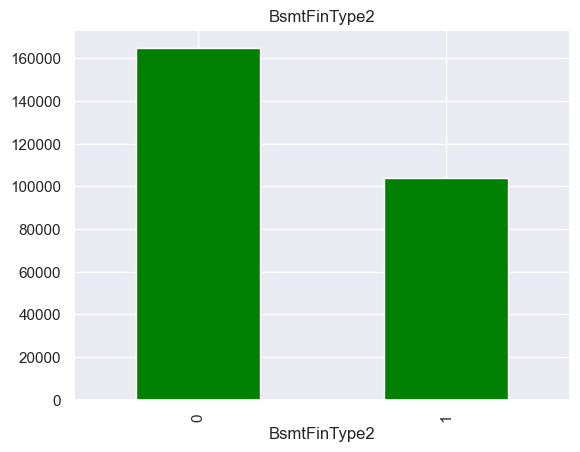

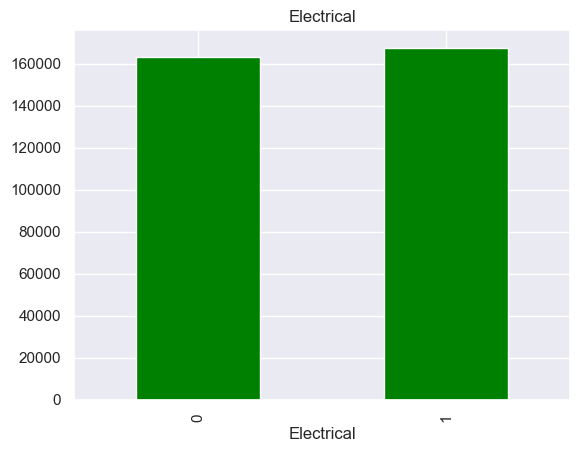

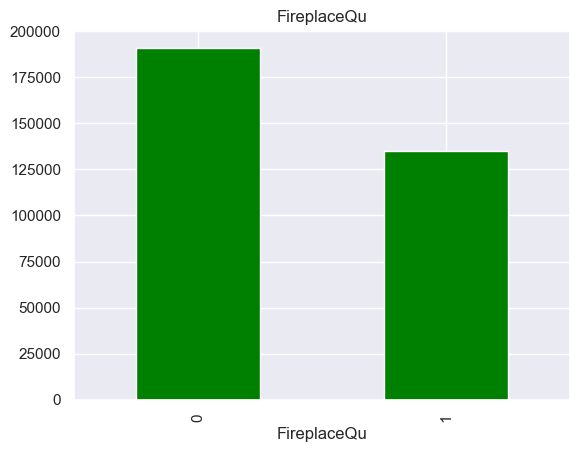

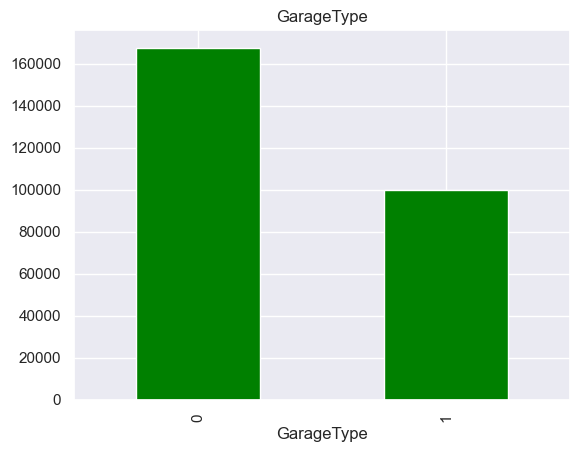

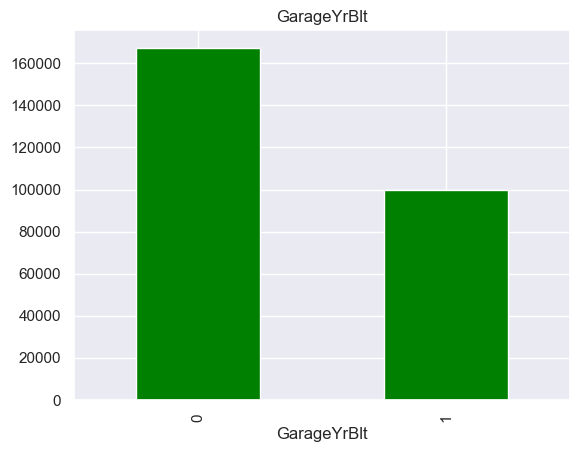

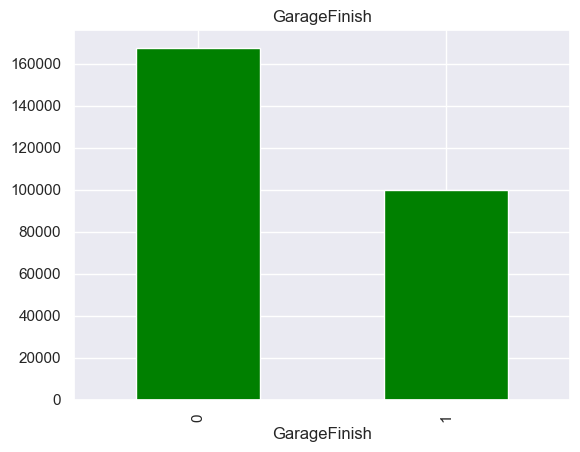

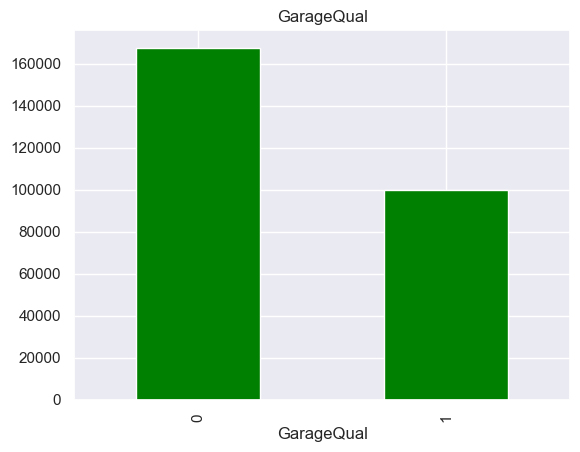

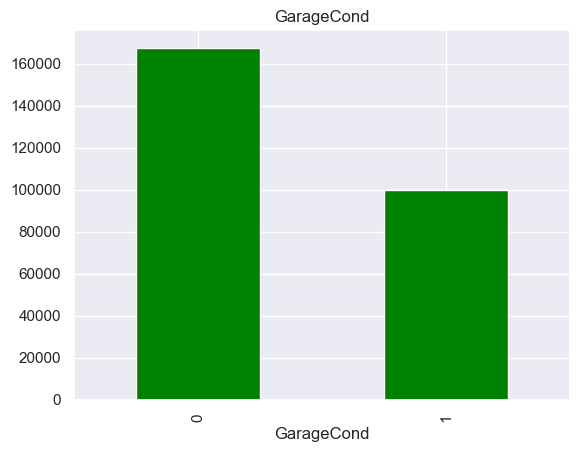

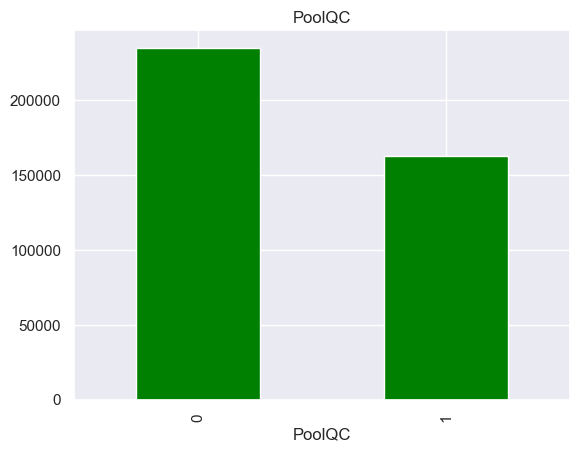

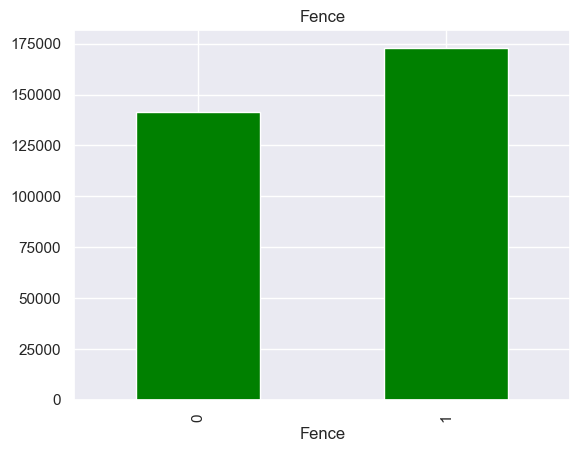

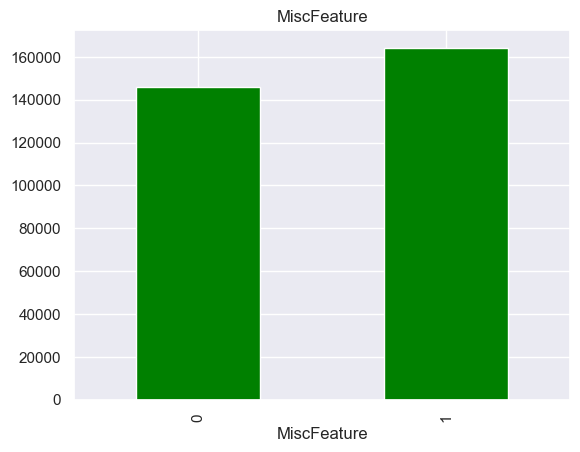

In [115]:
#features_with_na=[features for features in housing.columns if a housing[features].isnull().sum()>1]

for feature in features_withna:
    data = housing.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    #data.groupby(feature)['SalePrice'].median().plot.bar(hue="index")
    df = data.groupby(feature)['SalePrice'].median()
    #print(df.head())
    df.plot(kind='bar', colormap='ocean')
    #sns.barplot(data = df)
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Id is not required

Using the data dictionary we can see that the NA for certain columns does not mean missing data and has some significance

lets replace the NA with the proper values

In [116]:
housing.Alley = housing.Alley.fillna("No Alley")
housing.BsmtQual = housing.BsmtQual.fillna("No Basement")
housing.BsmtCond = housing.BsmtCond.fillna("No Basement")
housing.BsmtExposure = housing.BsmtExposure.fillna("No Basement")
housing.BsmtFinType1 = housing.BsmtFinType1.fillna("No Basement")
housing.BsmtFinType2 = housing.BsmtFinType2.fillna("No Basement")
housing.FireplaceQu = housing.FireplaceQu.fillna("No Fireplace")
housing.GarageType = housing.GarageType.fillna("No Garage")
housing.GarageFinish = housing.GarageFinish.fillna("No Garage")
housing.GarageQual = housing.GarageQual.fillna("No Garage")
housing.GarageCond = housing.GarageCond.fillna("No Garage")
housing.GarageYrBlt = housing.GarageYrBlt.fillna(0)
housing.PoolQC = housing.PoolQC.fillna("No Pool")
housing.Fence = housing.Fence.fillna("No Fence")
housing.MiscFeature = housing.MiscFeature.fillna("None")

In [117]:
null_cols = round(housing.isnull().mean()*100, 2)

filtered_cols = null_cols[null_cols > 0]

print("TOTAL MISSING VALUES for each column (in %):\n",filtered_cols )

TOTAL MISSING VALUES for each column (in %):
 LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64


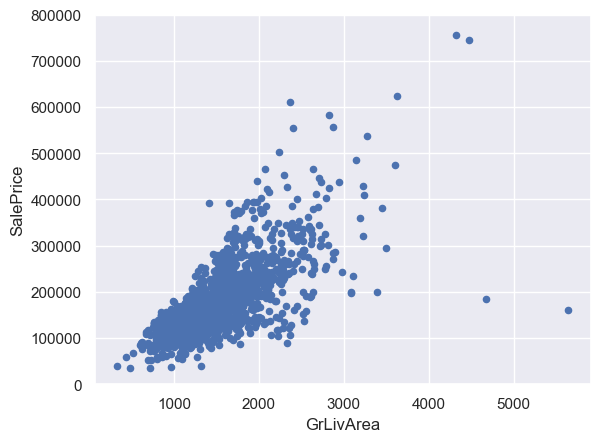

In [118]:
var = 'GrLivArea'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

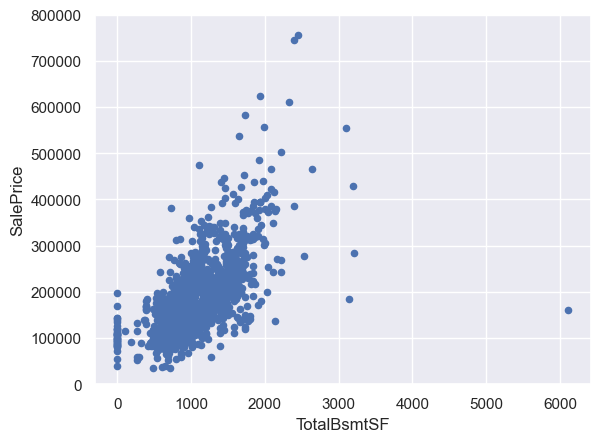

In [119]:
var = 'TotalBsmtSF'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

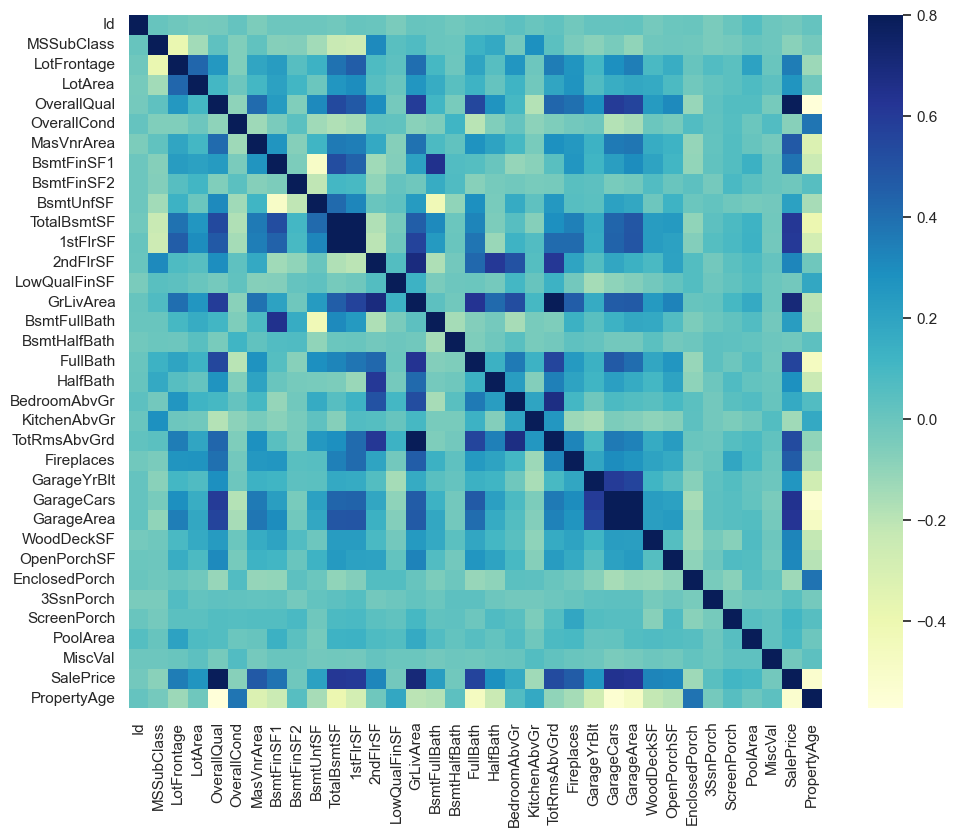

In [120]:
#correlation matrix
corrmat = housing.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="YlGnBu", vmax=.8, square=True);

## The below code is used to find the index of the k features that have the largest correlation with SalePrice in a pandas data frame. To find 10 highly correlated features with target var.

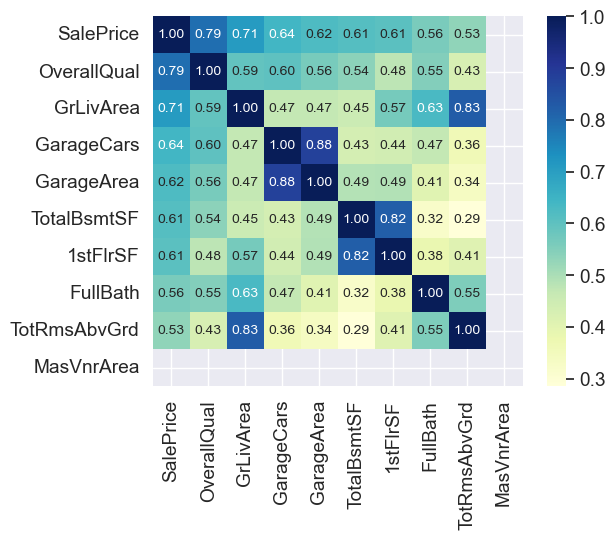

In [121]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## We can see that some of the variables are correlated

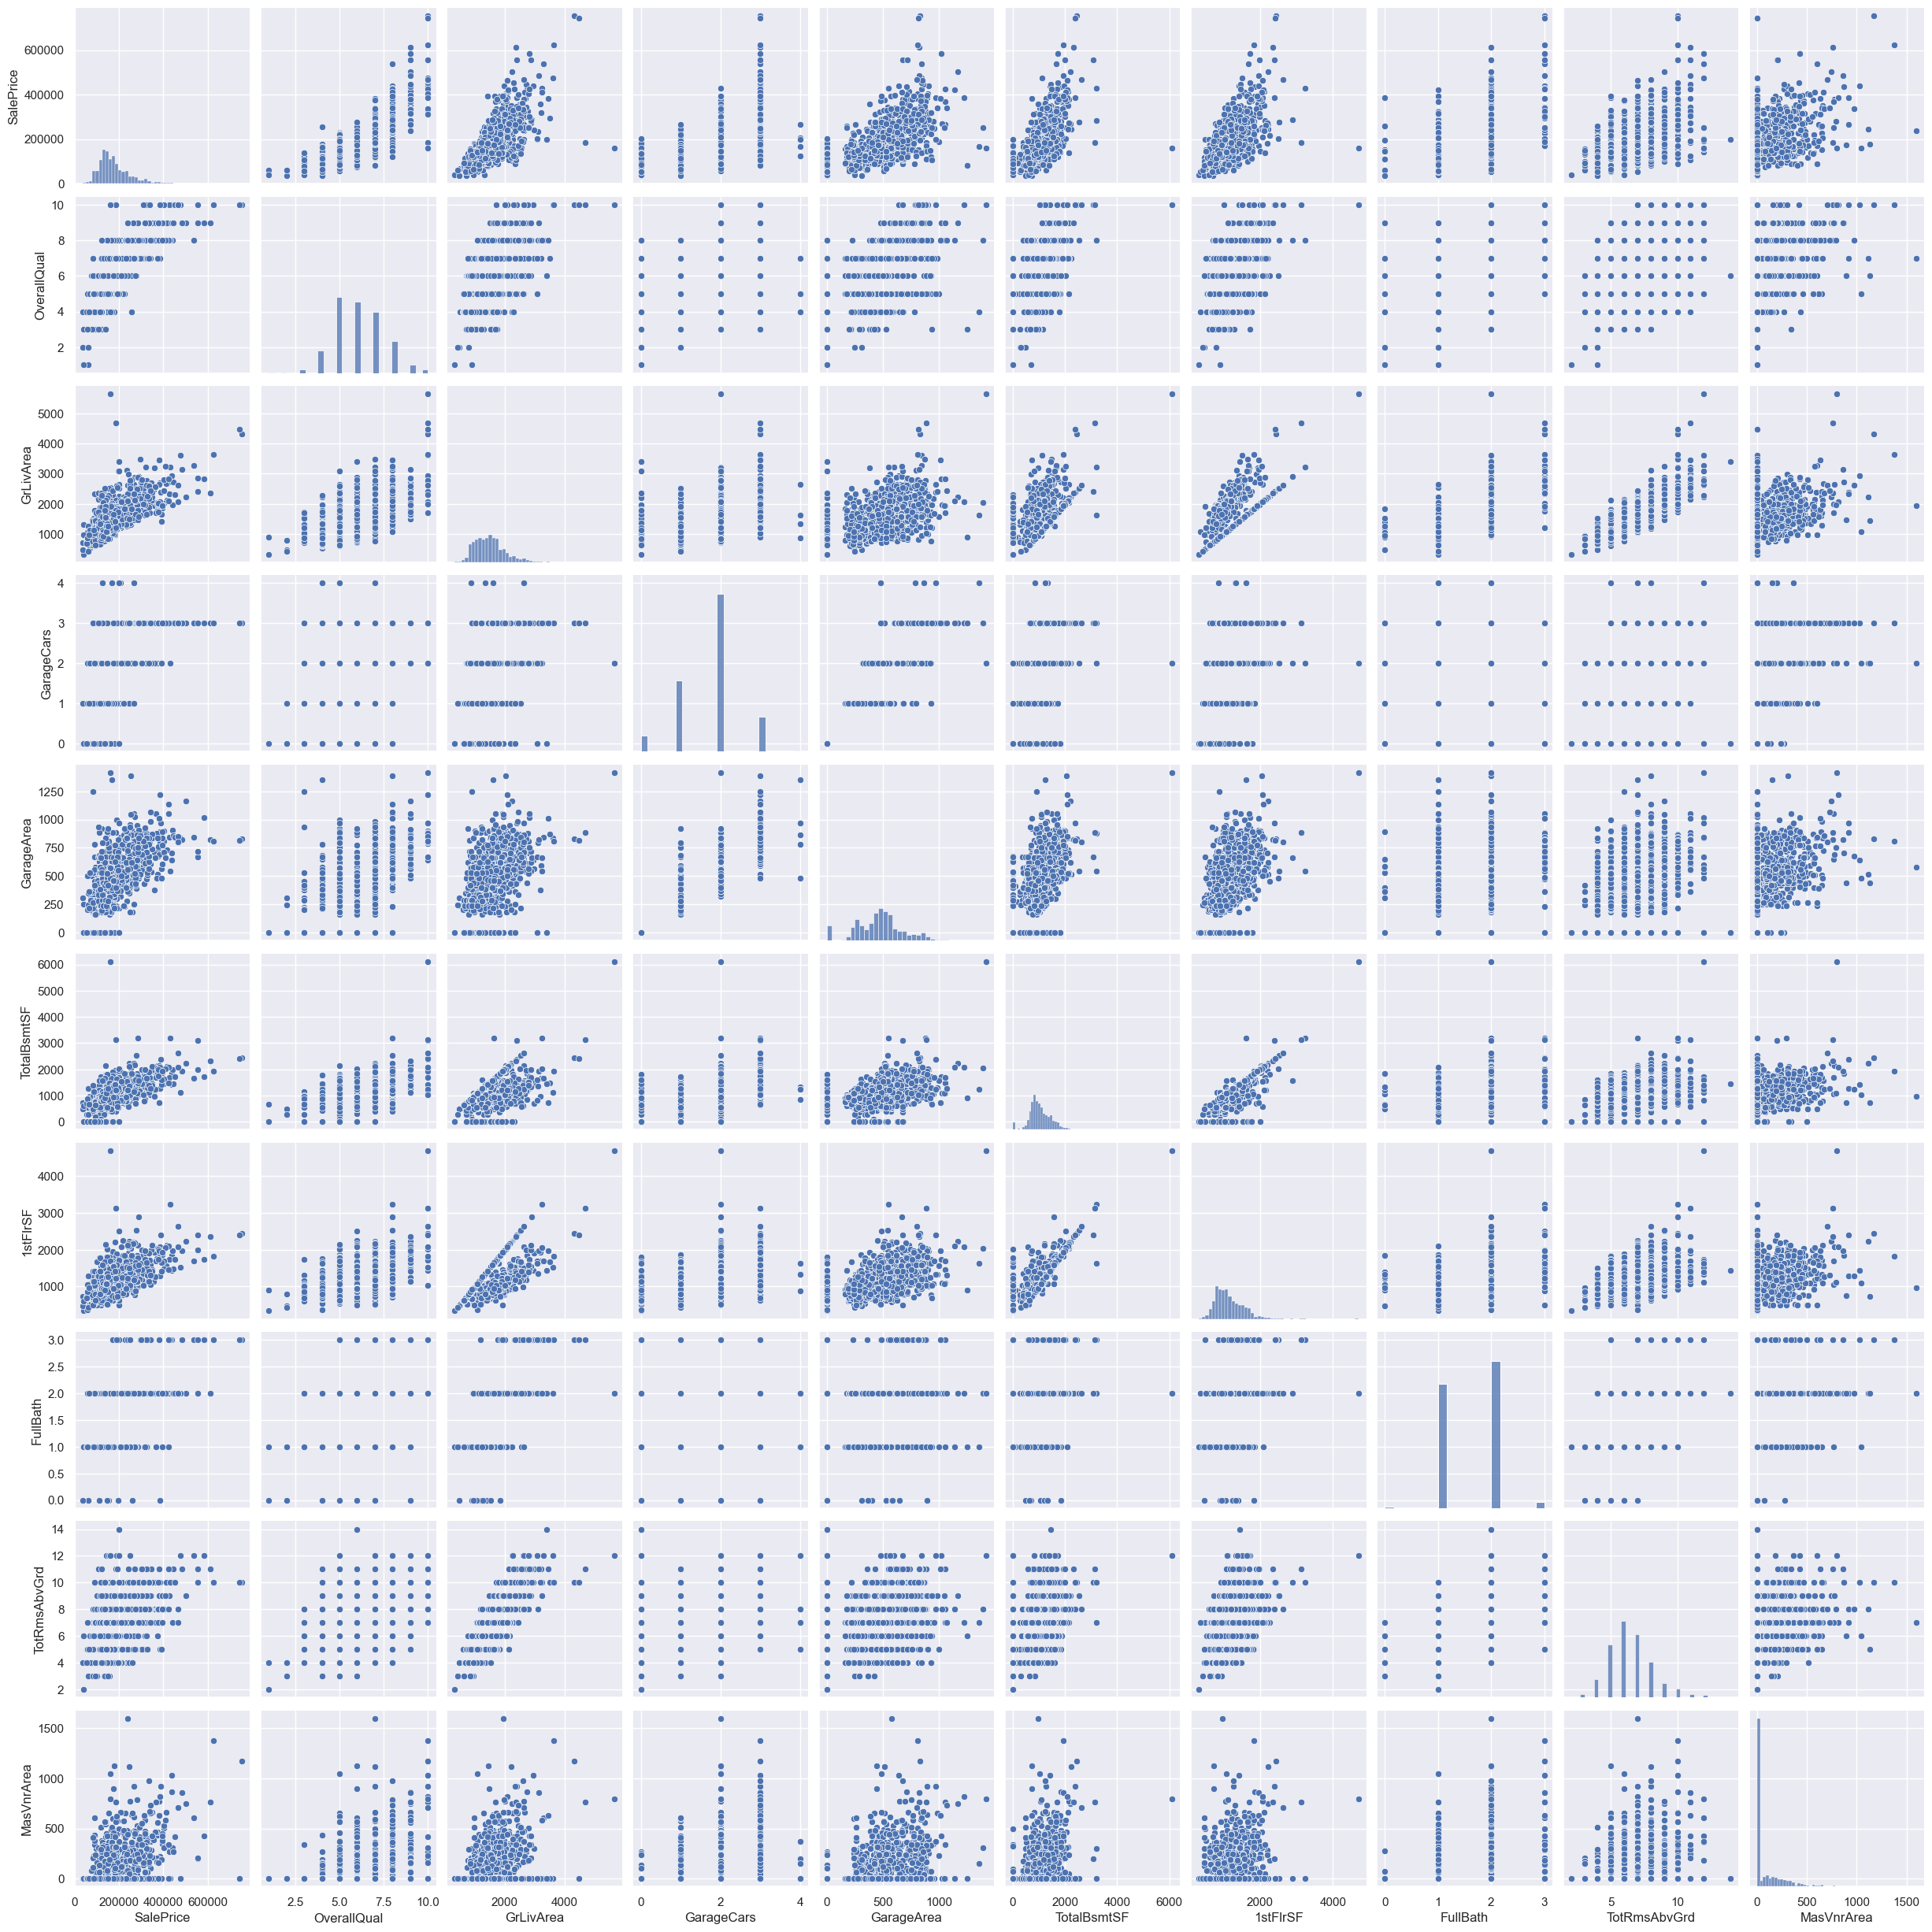

In [122]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea']

sns.pairplot(housing[cols], size = 2.5)
plt.show();

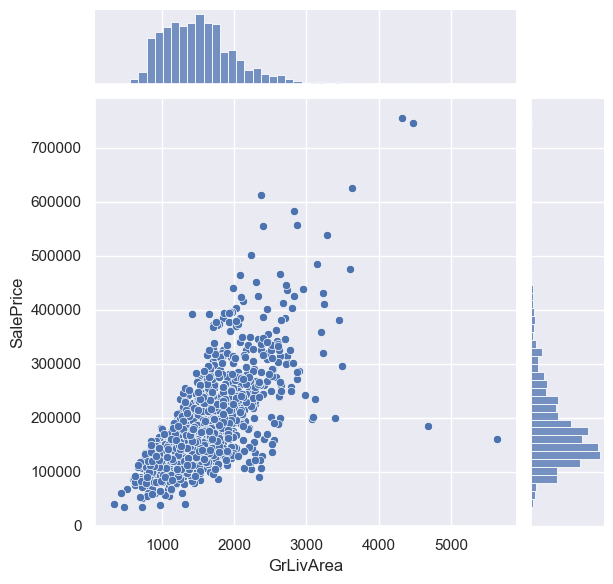

In [123]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=housing)
plt.show()

In [124]:
# Removing some outliers on lower right side of 'GrLivArea'
housing = remove_outliers(housing,'GrLivArea')
#Since the dataset is small it isn't advisable to do remove outliers.
housing.shape

(1429, 78)

# Missing Data 
### Lets impute the above columns with median and mode


In [125]:

housing.LotFrontage = housing.LotFrontage.fillna(housing.LotFrontage.median())
housing.MasVnrType = housing.MasVnrType.fillna(housing.MasVnrType.mode()[0])
housing.MasVnrArea = housing.MasVnrArea.fillna(housing.MasVnrArea.median())
housing.Electrical = housing.Electrical.fillna(housing.Electrical.mode()[0])


print("TOTAL MISSING VALUES after imputing :",housing.isna().sum().sum())

TOTAL MISSING VALUES after imputing : 0


In [126]:
#Checking features with na again after imput 

for feature in features_withna:  
    print(f"Feature {feature} : ")
    print (housing[feature].describe().T)
    print("\n")

Feature LotFrontage : 
count    1429.000000
mean       69.209237
std        20.492098
min        21.000000
25%        60.000000
50%        69.000000
75%        78.000000
max       313.000000
Name: LotFrontage, dtype: float64


Feature Alley : 
count         1429
unique           3
top       No Alley
freq          1340
Name: Alley, dtype: object


Feature MasVnrType : 
count     1429
unique       4
top       None
freq       859
Name: MasVnrType, dtype: object


Feature MasVnrArea : 
count    1429.000000
mean       97.747376
std       169.485566
min         0.000000
25%         0.000000
50%         0.000000
75%       158.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


Feature BsmtQual : 
count     1429
unique       5
top         TA
freq       641
Name: BsmtQual, dtype: object


Feature BsmtCond : 
count     1429
unique       5
top         TA
freq      1282
Name: BsmtCond, dtype: object


Feature BsmtExposure : 
count     1429
unique       5
top         No
freq       938
Na

In [127]:
#Finding columns where all entries are exactly same
same_value_cols = housing.columns[housing.nunique() == 1]
print(same_value_cols)

Index([], dtype='object')


In [128]:
# check for duplicates, standard EDA process
if housing.duplicated().any():
    housing.drop_duplicates(subset=None, inplace=True)
housing.shape

(1429, 78)

In [129]:
#now use value_counts to understand data in each of the columns / 

#Parsing all the columns
columns = housing.columns

for eachcol in columns:
    print(f"Value counts for column `{eachcol}` :")
    print(housing[eachcol].value_counts(), '\n')
    print("######################################################################################### ")

Value counts for column `Id` :
1       1
956     1
977     1
976     1
975     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: Id, Length: 1429, dtype: int64 

######################################################################################### 
Value counts for column `MSSubClass` :
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64 

######################################################################################### 
Value counts for column `MSZoning` :
RL         1125
RM          214
FV           65
RH           15
C (all)      10
Name: MSZoning, dtype: int64 

######################################################################################### 
Value counts for column `LotFrontage` :
69.0     265
60.0     141
70.0      70
80.0      68
50.0      57
        ... 
150.0      1
118.0      1
140.0      1
141.0

0       827
728      10
504       9
672       8
546       8
       ... 
1000      1
687       1
910       1
811       1
1152      1
Name: 2ndFlrSF, Length: 393, dtype: int64 

######################################################################################### 
Value counts for column `LowQualFinSF` :
0      1408
80        3
360       2
156       1
205       1
514       1
120       1
481       1
232       1
53        1
473       1
420       1
390       1
371       1
144       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64 

######################################################################################### 
Value counts for column `GrLivArea` :
864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1199     1
1586     1
1473     1
1256     1
Name: GrLivArea, Length: 831, dtype: int64 

######################################################################################### 
Value counts for column `BsmtFullBath` :
0 

In [130]:
#Finding columns where all entries are exactly same
same_value_cols = housing.columns[housing.nunique() == 1]
print(same_value_cols)

Index([], dtype='object')


### Now we will determine the data type of all features remaining

In [131]:
#type of each feature in data: int, float, object
types_train = housing.dtypes 

#numerical values are either type int or float
num_train = types_train[(types_train == 'int64') | (types_train == 'float64') ] 

#categorical values are type object
cat_train = types_train[types_train == object] 

In [132]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      32
float64     3
Name: 0, dtype: int64

In [133]:
#we should convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)

In [134]:
print(f"These are all the numerical features in our data : {numerical_values_train}")

These are all the numerical features in our data : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'PropertyAge']


In [135]:
categorical_values_train = list(cat_train.index)
print(f"These are all the caregorical features in our data. {categorical_values_train}")

These are all the caregorical features in our data. ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Data Preparation

The missing values are all handled, so we can go ahead with feature engineering, the next part of our data preprocessing. We need to create feature vectors that our model can use as training data. This requires us to change the categorical values into numbers that reflect them.

<Axes: xlabel='SalePrice', ylabel='Density'>

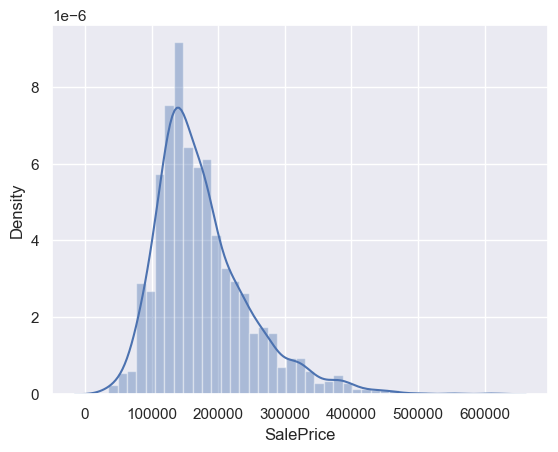

In [136]:
sns.distplot(housing["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Density'>

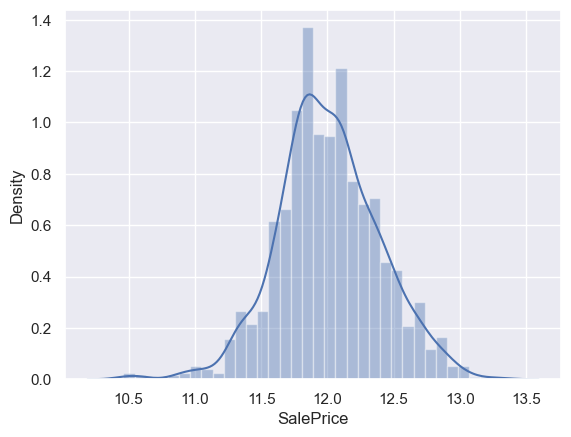

In [137]:
sns.distplot(np.log(housing["SalePrice"]))

The target, SalePrice, is very skewed and we can make it more normal by taking the logarithm. This can improve the performance of Machine Learning models, as they prefer normal targets over skewed ones. By applying the logarithm to the prices, we can enhance our model.

In [138]:
housing["TransformedSalePrice"] = np.log(housing["SalePrice"])

In [139]:
X = housing.drop(["Id", "SalePrice", "TransformedSalePrice"], axis=1)
y = housing["TransformedSalePrice"]

In [140]:
# Due to log transformation of response variable, numerical dataframe from before needs to be refreshed
types_train = housing.dtypes 
num_train = types_train[(types_train == 'int64') | (types_train == 'float64') ] 
numerical_values_train = list(num_train.index)
numerical_values_train.remove("Id")
numerical_values_train.remove("SalePrice")
numerical_values_train.remove("TransformedSalePrice")

print(f"These are all the numerical features in our data : {numerical_values_train}")

These are all the numerical features in our data : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'PropertyAge']


In [141]:

# convert into dummies - one hot encoding
np.random.seed(0)
X = pd.get_dummies(X,columns=categorical_values_train, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 0 to 1459
Columns: 252 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(30), uint8(219)
memory usage: 685.2 KB


In [142]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


We have successfully converted all the categorical strings into numerical values. Our models are ready to be built!

## Building Model
Now that we've preprocessed and explored our data, we have a much better understanding of the type of data that we're dealing with. Now, we can began to build and test different models for regression to predict the Sale Price of each house.

### Splitting the Data into Training and Testing Sets

In [143]:
scalerX = StandardScaler()
scalery = StandardScaler()

In [144]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [145]:

# split into train and testa

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [146]:
X_train[numerical_values_train] = scalerX.fit_transform(X_train[numerical_values_train])


In [147]:
y_train


127     11.373663
687     11.910358
1315    12.239991
149     11.652687
1195    12.078239
          ...    
818     11.951180
53      12.860999
357     11.805595
80      12.173033
808     11.982617
Name: TransformedSalePrice, Length: 1000, dtype: float64

In [148]:
y_train = pd.DataFrame(y_train)


In [149]:
y_train.TransformedSalePrice = scalery.fit_transform(y_train)


In [150]:
y_train = y_train.TransformedSalePrice


In [151]:
y_train


127    -1.645522
687    -0.241217
1315    0.621293
149    -0.915433
1195    0.198057
          ...   
818    -0.134403
53      2.246208
357    -0.515338
80      0.446092
808    -0.052148
Name: TransformedSalePrice, Length: 1000, dtype: float64

In [152]:
X_test[numerical_values_train] = scalerX.transform(X_test[numerical_values_train])


In [153]:
y_test = pd.DataFrame(y_test)


In [154]:
y_test.TransformedSalePrice = scalery.transform(y_test)


In [155]:
y_test = y_test.TransformedSalePrice


In [156]:
X_train


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
127,-0.274878,-0.714899,-0.584255,-0.767909,1.287463,-0.560276,-0.749445,-0.293863,0.001808,-0.876531,...,0,0,0,0,1,0,0,0,1,0
687,2.457272,-0.023555,-0.514223,0.723176,-0.523315,-0.560276,-0.457086,-0.293863,-0.559582,-1.169786,...,0,0,0,0,1,0,0,0,1,0
1315,0.081489,0.766552,0.068885,-0.022366,-0.523315,-0.560276,0.163286,1.426345,-0.872488,-0.197925,...,0,0,0,0,1,0,0,0,1,0
149,-0.156089,-0.023555,-0.403364,-0.767909,-1.428703,-0.560276,-1.025166,-0.293863,0.784074,-0.333646,...,0,0,0,0,1,0,0,0,1,0
1195,0.081489,-0.912426,-0.228627,-0.022366,-0.523315,-0.560276,-1.025166,-0.293863,0.397543,-0.740810,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,0.556646,0.519644,-0.151758,-0.022366,1.287463,-0.049605,0.172794,-0.293863,-0.113231,-0.057357,...,0,0,0,0,1,0,0,0,1,0
53,-0.868824,-0.072937,3.897280,2.214261,-0.523315,-0.560276,3.277032,-0.293863,-1.203801,1.959073,...,0,0,0,0,1,0,0,0,1,0
357,1.506959,-1.258097,-0.600273,-0.767909,-0.523315,-0.560276,1.052249,-0.293863,-0.660816,0.262558,...,0,0,0,0,1,0,0,0,1,0
80,0.081489,1.507277,0.256906,-0.022366,0.382074,3.116551,0.039687,-0.293863,-0.246676,-0.333646,...,0,0,0,0,1,0,0,0,1,0


In [157]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
57,0.081489,0.964079,0.124559,0.723176,-0.523315,-0.560276,-1.025166,-0.293863,0.701246,-0.420896,...,0,0,0,0,1,0,0,0,1,0
1143,-0.868824,-0.023555,-0.133786,-0.767909,-2.334092,-0.560276,-0.340618,-0.293863,0.374535,-0.067051,...,0,0,0,0,1,0,0,0,1,0
377,0.081489,1.606041,0.075527,1.468719,-0.523315,-0.560276,-1.025166,-0.293863,2.357808,1.324091,...,0,0,0,0,1,0,0,0,1,0
909,0.081489,3.926980,0.216762,-0.022366,-0.523315,-0.560276,-1.025166,-0.293863,0.429754,-0.706880,...,0,0,0,0,1,0,0,0,1,0
866,-0.868824,-0.122318,0.027960,1.468719,-0.523315,1.188770,-1.025166,-0.293863,2.491253,1.464660,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,-0.868824,-0.023555,1.540526,-0.767909,1.287463,0.646183,0.384338,-0.293863,0.091539,0.374043,...,0,0,0,0,1,0,0,0,1,0
391,0.081489,0.075208,0.179647,-0.022366,-0.523315,-0.560276,0.614898,-0.293863,-1.015137,-0.556617,...,0,0,0,0,1,0,0,0,1,0
927,0.081489,-0.023555,-0.045881,0.723176,-0.523315,1.622840,0.286885,-0.293863,-0.633207,-0.488756,...,0,0,0,0,1,0,0,0,1,0
977,1.506959,-1.702533,-0.595389,0.723176,-0.523315,-0.560276,1.603691,-0.293863,-0.966820,0.502493,...,0,0,1,0,0,0,0,0,0,1


In [158]:
y_train

127    -1.645522
687    -0.241217
1315    0.621293
149    -0.915433
1195    0.198057
          ...   
818    -0.134403
53      2.246208
357    -0.515338
80      0.446092
808    -0.052148
Name: TransformedSalePrice, Length: 1000, dtype: float64

In [159]:
y_test

57      0.486347
1143   -1.865004
377     1.920974
909     0.168153
866     1.104877
          ...   
1446   -0.085900
391     0.721776
927     0.198057
977     0.531234
1397   -0.447872
Name: TransformedSalePrice, Length: 429, dtype: float64

# Machine Learning Models



In [160]:
models = pd.DataFrame(columns=["Model", "Alpha", "MAE","MSE","RMSE","R2 Score","RMSE - Cross-Validation"])

#https://scikit-learn.org/stable/modules/cross_validation.html
def rmseCrossValidation(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluateModel(y, predictions):
    mae = round(mean_absolute_error(y, predictions), 5)
    mse = round(mean_squared_error(y, predictions),5)
    rmse = round(np.sqrt(mean_squared_error(y, predictions)),5)
    r_squared = round(r2_score(y, predictions), 5)
    return mae, mse, rmse, r_squared

## Linear Regression


In [161]:
def update_ols_model(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model, X_train_sm

def checkVIF(X_rfe) : 
    vif = pd.DataFrame()
    X = X_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [162]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


#rfe = RFE(estimator=lin_reg, n_features_to_select=150)            
rfe = RFE(estimator=lin_reg)            
rfe = rfe.fit(X_train, y_train)

In [163]:
# Print the coefficients and intercept
print(lin_reg.intercept_)
print(lin_reg.coef_)

-0.9088325500488257
[-5.20087932e-02  2.78967715e-02  7.20189668e-02  1.32741597e-01
  1.27237569e-01  1.00308656e-02  7.12773443e+10  2.71826389e+10
  7.36356423e+10 -6.99042498e+10 -1.37678494e+11 -1.59065678e+11
 -1.58222346e+10  1.72072331e+11  3.73153687e-02  9.14764404e-03
  2.79521942e-02  2.35652924e-02 -9.97924805e-03 -4.62646484e-02
  1.98974609e-02  2.16331482e-02  6.27212524e-02  6.58702850e-02
  2.90107727e-02  3.53851318e-02  8.35609436e-03  2.16388702e-02
  2.09922791e-02  3.38630676e-02 -3.75852585e-02 -1.94354057e-02
 -1.51796341e-01  1.06078243e+00  9.51439142e-01  9.70624924e-01
  8.26200485e-01  2.30283022e-01 -9.20951366e-04  3.08065414e-02
  4.65424061e-02  1.61554059e-03  1.39389038e-02  3.94010544e-02
 -1.09338522e-01  1.85160637e-02  8.47967371e+09  6.56657219e-02
 -7.74072409e-02 -1.08577698e-01 -5.65619469e-02  3.42154503e-02
 -4.56154764e-01 -9.32005048e-02 -2.09106922e-01  6.80326223e-02
  9.10789967e-02 -4.99620438e-02  3.42484236e-01 -1.59766197e-01
 -6.2

In [164]:
lm0, X_train_rfe0 = update_ols_model(y_train,X_train)


                             OLS Regression Results                             
Dep. Variable:     TransformedSalePrice   R-squared:                       0.947
Model:                              OLS   Adj. R-squared:                  0.930
Method:                   Least Squares   F-statistic:                     56.93
Date:                  Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                          19:56:20   Log-Likelihood:                 45.471
No. Observations:                  1000   AIC:                             385.1
Df Residuals:                       762   BIC:                             1553.
Df Model:                           237                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

In [165]:
vif = checkVIF(X_train)
vif

,Features,VIF
225,GarageCond_No Garage,inf
159,BsmtQual_No Basement,inf
214,GarageType_No Garage,inf
215,GarageFinish_No Garage,inf
218,GarageQual_Fa,inf
...,...,...
46,Utilities_NoSeWa,NaN
89,Condition2_RRAn,NaN
108,RoofMatl_Metal,NaN
109,RoofMatl_Roll,NaN


In [166]:
predictions = lin_reg.predict(X_test)

In [167]:
mae, mse, rmse, r_squared = evaluateModel(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmseCrossValidation(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression", "Alpha" : "NA", "MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE - Cross-Validation": rmse_cross_val}

models = models.append(new_row, ignore_index=True)

MAE: 35665396.64374
MSE: 2.3451717859464445e+17
RMSE: 484269737.43426
R2 Score: -2.2703924930388688e+17
------------------------------
RMSE Cross-Validation: 0.12676003984923084


## Ridge and Lasso Regression

## Ridge Regression

In [168]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [169]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010707,0.001877,0.003299,0.000402,0.0001,{'alpha': 0.0001},-0.209870,-0.254048,-0.266898,-0.219516,...,-0.238790,0.021232,27,-0.160476,-0.151163,-0.151623,-0.156896,-0.150528,-0.154137,0.003898
1,0.012516,0.002639,0.005441,0.001515,0.001,{'alpha': 0.001},-0.209753,-0.253930,-0.266772,-0.219262,...,-0.238592,0.021243,26,-0.160496,-0.151182,-0.151631,-0.156909,-0.150544,-0.154152,0.003900
2,0.009538,0.002486,0.004185,0.000733,0.01,{'alpha': 0.01},-0.208820,-0.252877,-0.265648,-0.217181,...,-0.237128,0.021338,25,-0.160652,-0.151310,-0.151710,-0.157043,-0.150759,-0.154295,0.003900
3,0.008482,0.001991,0.003906,0.000660,0.05,{'alpha': 0.05},-0.206211,-0.249405,-0.261987,-0.212193,...,-0.233365,0.021333,23,-0.161112,-0.151607,-0.152071,-0.157536,-0.151288,-0.154723,0.003931
4,0.009301,0.000599,0.003800,0.000401,0.1,{'alpha': 0.1},-0.204434,-0.246285,-0.258388,-0.209319,...,-0.230509,0.020823,22,-0.161644,-0.152087,-0.152475,-0.158084,-0.151728,-0.155204,0.003975


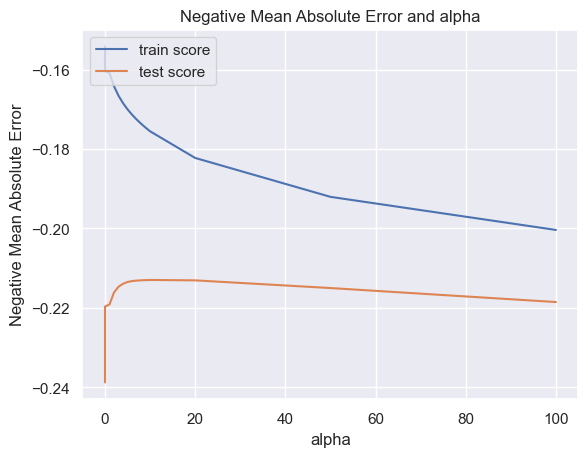

In [170]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [171]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)



{'alpha': 10.0}


In [172]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.38787146e-02  2.69060909e-02  5.40449270e-02  1.83143949e-01
  1.38439162e-01  7.60151468e-03  7.83097134e-02  2.73696087e-02
  6.17263500e-03  9.69928517e-02  9.92093609e-02  9.76623663e-02
  1.37820142e-03  1.69786345e-01  4.08874666e-02  1.13903253e-02
  3.55779257e-02  2.65895110e-02 -1.74654514e-02 -3.65863277e-02
  3.01482808e-02  2.22907035e-02  1.64598679e-02  7.85480574e-02
  1.72803477e-02  3.64637623e-02  3.77232819e-03  2.55336415e-02
  1.70329840e-02  3.45635543e-02  2.77704298e-02 -1.68665225e-03
 -1.44756970e-01  1.38316357e-01  5.24950936e-02  1.40811085e-01
 -5.11618568e-03  1.07786281e-01 -1.95520506e-03  3.87300182e-02
  2.07133583e-02  2.16847404e-03  1.46957008e-02  3.27377799e-02
 -5.96184665e-02  2.17633335e-02  0.00000000e+00  8.19711553e-02
 -4.38387784e-02 -9.10714572e-03 -4.40816841e-02  6.33325838e-03
 -1.04751006e-01 -1.79056265e-02 -5.93716096e-02  9.04067552e-02
  8.42319798e-02 -1.50089735e-02  2.65567977e-01 -8.91564000e-02
 -4.00975011e-02 -8.05518

In [173]:
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluateModel(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmseCrossValidation(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge", "Alpha" : 10, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE - Cross-Validation": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.21093
MSE: 0.08838
RMSE: 0.29729
R2 Score: 0.91444
------------------------------
RMSE Cross-Validation: 0.11523151724654615


## Lasso Regression

In [174]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [175]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [176]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073088,0.006186,0.005466,0.000857,0.0001,{'alpha': 0.0001},-0.205164,-0.243163,-0.251836,-0.205405,...,-0.226539,0.019080,2,-0.163898,-0.153657,-0.153783,-0.160449,-0.154252,-0.157208,0.004203
1,0.039538,0.004429,0.004685,0.000493,0.001,{'alpha': 0.001},-0.204134,-0.227519,-0.218370,-0.199847,...,-0.212885,0.009936,1,-0.181253,-0.175974,-0.176443,-0.179709,-0.172649,-0.177205,0.003017
2,0.012840,0.002103,0.004200,0.000748,0.01,{'alpha': 0.01},-0.232890,-0.237514,-0.220021,-0.214418,...,-0.227651,0.008846,3,-0.218777,-0.210491,-0.215387,-0.218925,-0.214882,-0.215692,0.003091
3,0.009366,0.001769,0.003197,0.001472,0.05,{'alpha': 0.05},-0.251389,-0.269431,-0.245874,-0.250597,...,-0.252859,0.008544,4,-0.247918,-0.244012,-0.249747,-0.249531,-0.246178,-0.247477,0.002157
4,0.009325,0.001066,0.004202,0.001168,0.1,{'alpha': 0.1},-0.289985,-0.312169,-0.287618,-0.288101,...,-0.288668,0.014790,5,-0.285897,-0.283486,-0.288551,-0.285875,-0.284966,-0.285755,0.001651


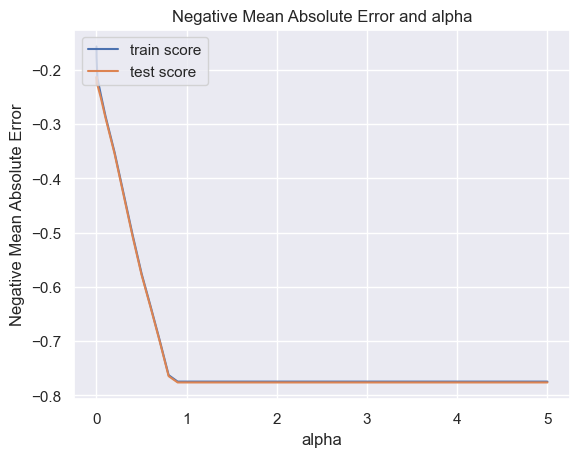

In [177]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

## From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.8 and stabilises thereafter,
## But we have to choose a low value of alpha to balance the trade-off between Bias-Variance  and to get the coefficients of smallest of features.

In [178]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)

#lasso = Lasso()
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [179]:
lasso.coef_

array([-0.02323038,  0.02627156,  0.05268216,  0.18539268,  0.14235616,
        0.00587152,  0.06856816,  0.01779336, -0.        ,  0.10711937,
        0.01362185,  0.        , -0.00998318,  0.28865117,  0.04368646,
        0.011717  ,  0.02419282,  0.01990262, -0.01480758, -0.03110913,
        0.02310583,  0.02327219,  0.01295854,  0.08118722,  0.01699435,
        0.03650203,  0.0026961 ,  0.02398225,  0.014527  ,  0.03393929,
        0.02735929, -0.00252977, -0.16416576,  0.23470051,  0.0200068 ,
        0.16605373,  0.        ,  0.11676762, -0.        ,  0.02182601,
        0.        ,  0.        ,  0.01523909,  0.        , -0.03296149,
        0.01283535,  0.        ,  0.10212983, -0.        , -0.        ,
       -0.0313844 , -0.        , -0.10331789, -0.        , -0.        ,
        0.1309139 ,  0.10615923, -0.        ,  0.34570001, -0.06643   ,
       -0.00504373, -0.02339294, -0.18399019, -0.07149724,  0.01421205,
       -0.        , -0.02517425,  0.        ,  0.07614272, -0.01

In [180]:
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluateModel(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmseCrossValidation(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso", "Alpha" : 0.001,"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE - Cross-Validation": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.21216
MSE: 0.08929
RMSE: 0.29881
R2 Score: 0.91356
------------------------------
RMSE Cross-Validation: 0.11626855210399308


In [181]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [182]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Ridge,Lasso
MSSubClass,-0.023879,-0.023230
LotFrontage,0.026906,0.026272
LotArea,0.054045,0.052682
OverallQual,0.183144,0.185393
OverallCond,0.138439,0.142356
...,...,...
SaleCondition_AdjLand,0.024579,0.000000
SaleCondition_Alloca,0.070090,0.069766
SaleCondition_Family,-0.055755,-0.000000
SaleCondition_Normal,0.218329,0.255108


In [183]:
# Check features removed by Lasso regression
betas[betas['Lasso']==0]

,Ridge,Lasso
BsmtUnfSF,0.006173,-0.0
2ndFlrSF,0.097662,0.0
MSZoning_RM,-0.005116,0.0
Alley_No Alley,-0.001955,-0.0
LotShape_IR2,0.020713,0.0
...,...,...
SaleType_ConLw,-0.014905,-0.0
SaleType_Oth,0.040860,0.0
SaleCondition_AdjLand,0.024579,0.0
SaleCondition_Family,-0.055755,-0.0


In [184]:
# Number of features removed by Lasso regression
betas[betas['Lasso']==0].shape

(137, 2)

In [185]:
# Check features features selected by Lasso regression
betas.loc[betas['Lasso']!=0, 'Lasso']

MSSubClass             -0.023230
LotFrontage             0.026272
LotArea                 0.052682
OverallQual             0.185393
OverallCond             0.142356
                          ...   
MiscFeature_None        0.030427
SaleType_New            0.311448
SaleType_WD            -0.074531
SaleCondition_Alloca    0.069766
SaleCondition_Normal    0.255108
Name: Lasso, Length: 115, dtype: float64

In [186]:
# View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

Neighborhood_Crawfor    0.265568
SaleCondition_Normal    0.218329
OverallQual             0.183144
GrLivArea               0.169786
SaleType_New            0.165344
Neighborhood_StoneBr    0.159674
MSZoning_RL             0.140811
Foundation_PConc        0.140447
OverallCond             0.138439
MSZoning_FV             0.138316
Name: Ridge, dtype: float64

In [187]:
# To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

Neighborhood_Crawfor    1.304172
SaleCondition_Normal    1.243996
OverallQual             1.200987
GrLivArea               1.185052
SaleType_New            1.179799
Neighborhood_StoneBr    1.173128
MSZoning_RL             1.151207
Foundation_PConc        1.150788
OverallCond             1.148480
MSZoning_FV             1.148339
Name: Ridge, dtype: float64

In [188]:
# View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

Neighborhood_Crawfor    0.345700
SaleType_New            0.311448
GrLivArea               0.288651
SaleCondition_Normal    0.255108
MSZoning_FV             0.234701
Neighborhood_StoneBr    0.215100
OverallQual             0.185393
MSZoning_RL             0.166054
Exterior1st_BrkFace     0.154384
OverallCond             0.142356
Name: Lasso, dtype: float64

In [189]:
# To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

Neighborhood_Crawfor    1.412979
SaleType_New            1.365401
GrLivArea               1.334626
SaleCondition_Normal    1.290601
MSZoning_FV             1.264530
Neighborhood_StoneBr    1.239986
OverallQual             1.203691
MSZoning_RL             1.180637
Exterior1st_BrkFace     1.166938
OverallCond             1.152987
Name: Lasso, dtype: float64

In [190]:
models.sort_values(by="RMSE - Cross-Validation")

,Model,Alpha,MAE,MSE,RMSE,R2 Score,RMSE - Cross-Validation
1,Ridge,10,2.109300e-01,8.838000e-02,2.972900e-01,9.144400e-01,0.115232
2,Lasso,0.001,2.121600e-01,8.929000e-02,2.988100e-01,9.135600e-01,0.116269
0,LinearRegression,NA,3.566540e+07,2.345172e+17,4.842697e+08,-2.270392e+17,0.126760


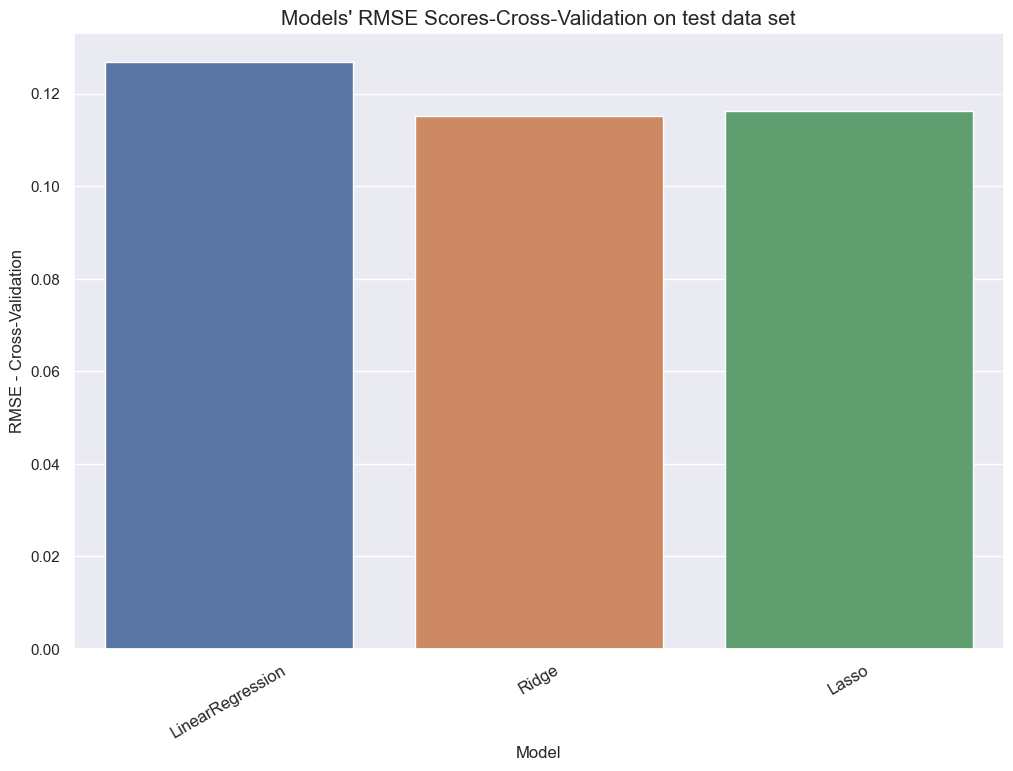

In [191]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE - Cross-Validation"])
plt.title("Models' RMSE Scores-Cross-Validation on test data set", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

# Observations 

Based on the data in the table, it seems that the ridge model is the best among the 3 models. This is because it has the lowest values of MAE, MSE, and RMSE, which are error metrics that measure how close the predictions are to the actual values. A lower error means a better fit of the model to the data. The lasso model also has the highest value of R2 score, which is a metric that measures how well the model explains the variation in the data. A higher R2 score means a higher proportion of variance explained by the model. The ridge model also has the lowest value of RMSE in cross-validation, which is a technique that splits the data into multiple subsets and uses some of them for training and some of them for testing. This way, you can avoid overfitting and get a more reliable estimate of the model's generalization ability. A lower RMSE in cross-validation means a better performance of the model on unseen data. 

Therefore, based on these metrics, the ridge model is the most good among the three models.

### Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
### it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables.

## Inferences

The house price is affected by the predictors that Surprise Housing should watch out for. The positive coefficients indicate a high sale value when they are high.
Some of those features are:-

| **Feature** | **Description**|
| ----------------- | -------------- |
| GrLivArea	| Above grade (ground) living area square feet|
| OverallQual |	Rates the overall material and finish of the house |
| OverallCond |	Rates the overall condition of the house |
| SaleType_New |	Type of sale New |
| Neighborhood_Crawfor |	Physical locations within Ames city limits Crawfor |
| SaleCondition | Condition of sale : normal |
| MSZoning | Identifies the general zoning classification of the sale. : FV|

The higher values of negative coeeficients suggest a decrease in sale value.

Some of those features are:-

| **Feature** |	**Description**|
| ----------------- | -------------- |
| PropAge	| Age of the property at the time of seeling |


When the market value of the property is lower than the Predicted Sale Price, its the time to buy.
